# {Natural Disasters Mitigation}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

With natural disasters always seem to be popping up nowadays, so how does one mitigate for a natural disasters?

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

What are mitigation measures in place for disasters for certain disasters?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
My hypothesis is that there may be multipule methods in place for disasters, however there may be one option that works the best for Severe Storms.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

FEMA Mitigation ideas and perpare - https://www.fema.gov/sites/default/files/2020-06/fema-mitigation-ideas_02-13-2013.pdf
I will be using this to have a better understanding of what ways there are to help perpare for a natural disaster and what to do if one does happen.

Hazard Mitigation Assistance Mitigated Properties - https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-mitigated-properties-v3
I will be using this dataset to help explain the ways to react to a natural disaster.

FEMA Web Declaration Areas - https://www.fema.gov/openfema-data-page/fema-web-declaration-areas-v1
I will be using this dataset to help expand the dataset from above with dates of each disaster. I plan to use the disaster number found in this dataset to and the one above to join and connect the 2.

OpenFEMA Dataset: Disaster Declarations Summaries- https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2
I will being using this dataset to try and help me fill in gaps that may be missing and to help determine what the type of the disaster that took place.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach is simple. The datasets provide information on what was done to mitigate what was done at verious locations what where hit by some type of nature disaster. I plan on showing what tactics where used and see if I can compare what tactics may be more effective when dealing with a natural disaster. 

## Checking to See if any Duplicate or Missing Values

In [11]:
import pandas as pd

HMFilePath = 'Data/FEMA_DataSets/HazardMitigationAssistanceMitigatedProperties (2).csv'
HMData = pd.read_csv(HMFilePath)

# Check for duplicates
HMDuplicates = HMData[HMData.duplicated()]
if not HMDuplicates.empty:
    print("Duplicate rows found:")
    print(HMDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
HMMissingValues = HMData.isnull().sum()
if HMMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(HMMissingValues[HMMissingValues > 0])
else:
    print("No missing values found.")


No duplicate rows found.
Columns with missing values:
disasterNumber       6019
propertyAction       3107
structureType        5514
typeOfResidency     25976
foundationType       6805
county               1062
city                    2
state                  24
stateNumberCode        24
region                 24
zip                     8
damageCategory      45847
actualAmountPaid    24367
dtype: int64


In [10]:
import pandas as pd

FWFilePath = 'Data/FEMA_DataSets/FemaWebDeclarationAreas.csv'
FWData = pd.read_csv(FWFilePath)

# Check for duplicates
FWDuplicates = FWData[FWData.duplicated()]
if not FWDuplicates.empty:
    print("Duplicate rows found:")
    print(FWDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
FWMissingValues = FWData.isnull().sum()
if FWMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(FWMissingValues[FWMissingValues > 0])
else:
    print("No missing values found.")

No duplicate rows found.
Columns with missing values:
entryDate           17
closeoutDate    134877
dtype: int64


In [9]:
import pandas as pd

DDFilePath = 'Data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
DDData = pd.read_csv(DDFilePath)

# Check for duplicates
DDDuplicates = DDData[DDData.duplicated()]
if not DDDuplicates.empty:
    print("Duplicate rows found:")
    print(DDDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
DDMissingValues = DDData.isnull().sum()
if DDMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(DDMissingValues[DDMissingValues > 0])
else:
    print("No missing values found.")


No duplicate rows found.
Columns with missing values:
incidentEndDate           533
disasterCloseoutDate    16009
lastIAFilingDate        46963
dtype: int64


Since there are a may missing values in both datasets, I  have decided to keep them due to the fact I don't believe that they will being bring any harm to the data. On the other hand it is great to see that there is no duplicate data! I will not being checking the other 

## Before we get started, what is a Natural Disaster?
A natural disaster is the highly harmful impact on a society or community following a natural hazard event. Some examples of natural hazard events include: flooding, drought, earthquake, tropical cyclone, lightning, tsunami, volcanic activity, wildfire.

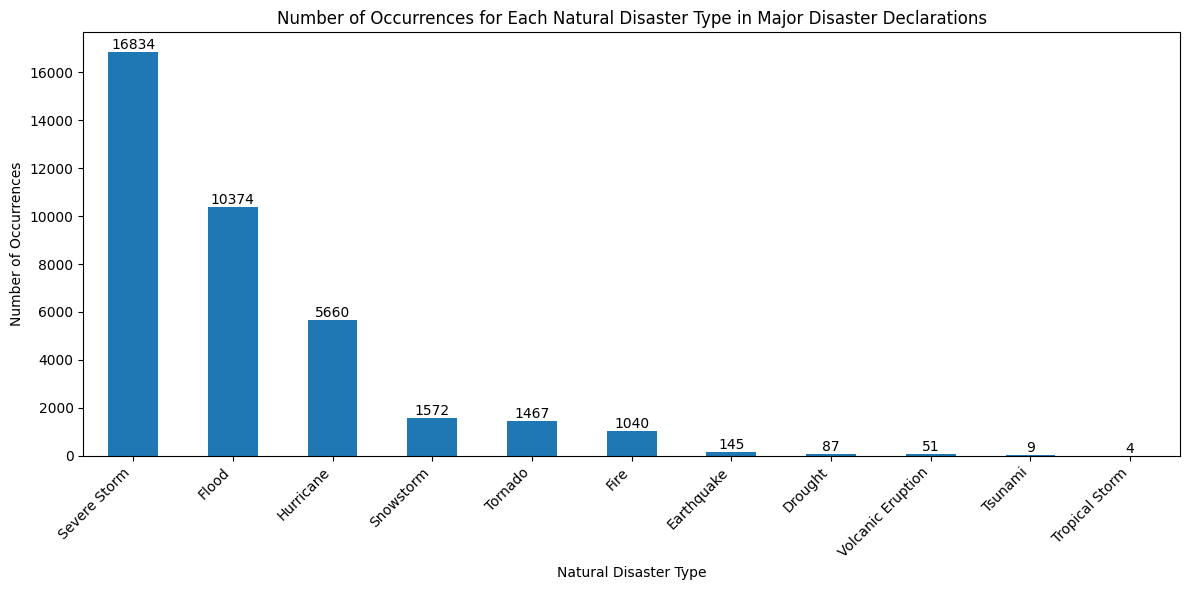

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
data = pd.read_csv(filePath)

# Define a list of incident types considered as natural disasters
natural_disasters = [
    'Hurricane', 'Tornado', 'Severe Storm', 'High Water', 'Wind-driven Water',
    'Tidal Wave', 'Tsunami', 'Tropical Storm', 'Earthquake', 'Volcanic Eruption', 'Landslide',
    'Mudslide', 'Snowstorm', 'Drought', 'Fire', 'Flood'
]

# Filter data to include only Major Disaster Declarations (declarationType = 'DR') caused by nature
nature_major_disasters = data[(data['declarationType'] == 'DR') & (data['incidentType'].isin(natural_disasters))]

# Count occurrences of each incident type within Major Disaster Declarations caused by nature
incident_counts = nature_major_disasters['incidentType'].value_counts()

plt.figure(figsize=(12, 6))
bars = incident_counts.plot(kind='bar')
plt.title('Number of Occurrences for Each Natural Disaster Type in Major Disaster Declarations')
plt.xlabel('Natural Disaster Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate each bar with its count
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom')

plt.show()


The graph above shows different types of natural disasters that can be classified as major dasters. For the purpose of this assignment we will be focusing on using the Severe Storm column due to having the biggest number of major natural disasters. I used a bar chart to easily show the numbers.

In [45]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
file1 = 'data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
file2 = 'data/FEMA_DataSets/HazardMitigationAssistanceMitigatedProperties (2).csv'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Perform a left join based on 'Disasternumber'
merged_data = pd.merge(data1, data2, on='disasterNumber', how='left')

# Display the merged data or perform further operations
print(merged_data)


        femaDeclarationString  disasterNumber state_x declarationType  \
0                  FM-5389-AZ            5389      AZ              FM   
1                  FM-5389-AZ            5389      AZ              FM   
2                  FM-5464-RI            5464      RI              FM   
3                  FM-5463-KS            5463      KS              FM   
4                  FM-5462-NE            5462      NE              FM   
...                       ...             ...     ...             ...   
2960450            DR-1008-CA            1008      CA              DR   
2960451            DR-1008-CA            1008      CA              DR   
2960452            DR-1008-CA            1008      CA              DR   
2960453            DR-1008-CA            1008      CA              DR   
2960454            DR-1008-CA            1008      CA              DR   

                  declarationDate  fyDeclared incidentType  \
0        2021-06-06T00:00:00.000Z        2021         Fire   

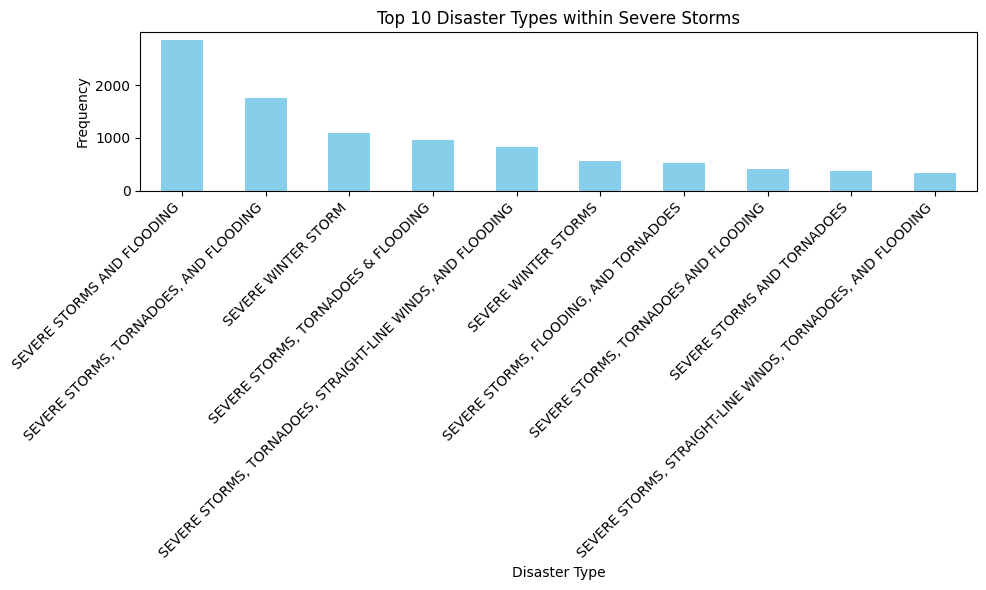

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
data = pd.read_csv(file_path)

# Filter the data for 'Severe Storm(s)'
severe_storm_data = data[data['incidentType'] == 'Severe Storm']

# Assuming 'declarationTitle' contains different disaster types within 'Severe Storm(s)'
disaster_type_counts = severe_storm_data['declarationTitle'].value_counts()

# Selecting top N categories to display
top_categories = 10  # Adjust the number of top categories to display
top_disaster_types = disaster_type_counts.head(top_categories)

# Plotting a bar plot for the top categories
plt.figure(figsize=(10, 6))
top_disaster_types.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_categories} Disaster Types within Severe Storms')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


For this chart I wanted to go even further and break down what is all considered in a "Severe Storm". Due to the fact that there is a large amount of sub classes in Severe Storms I decided to do the top 10. I chose a histogram because it suits the type of data I wish to display.

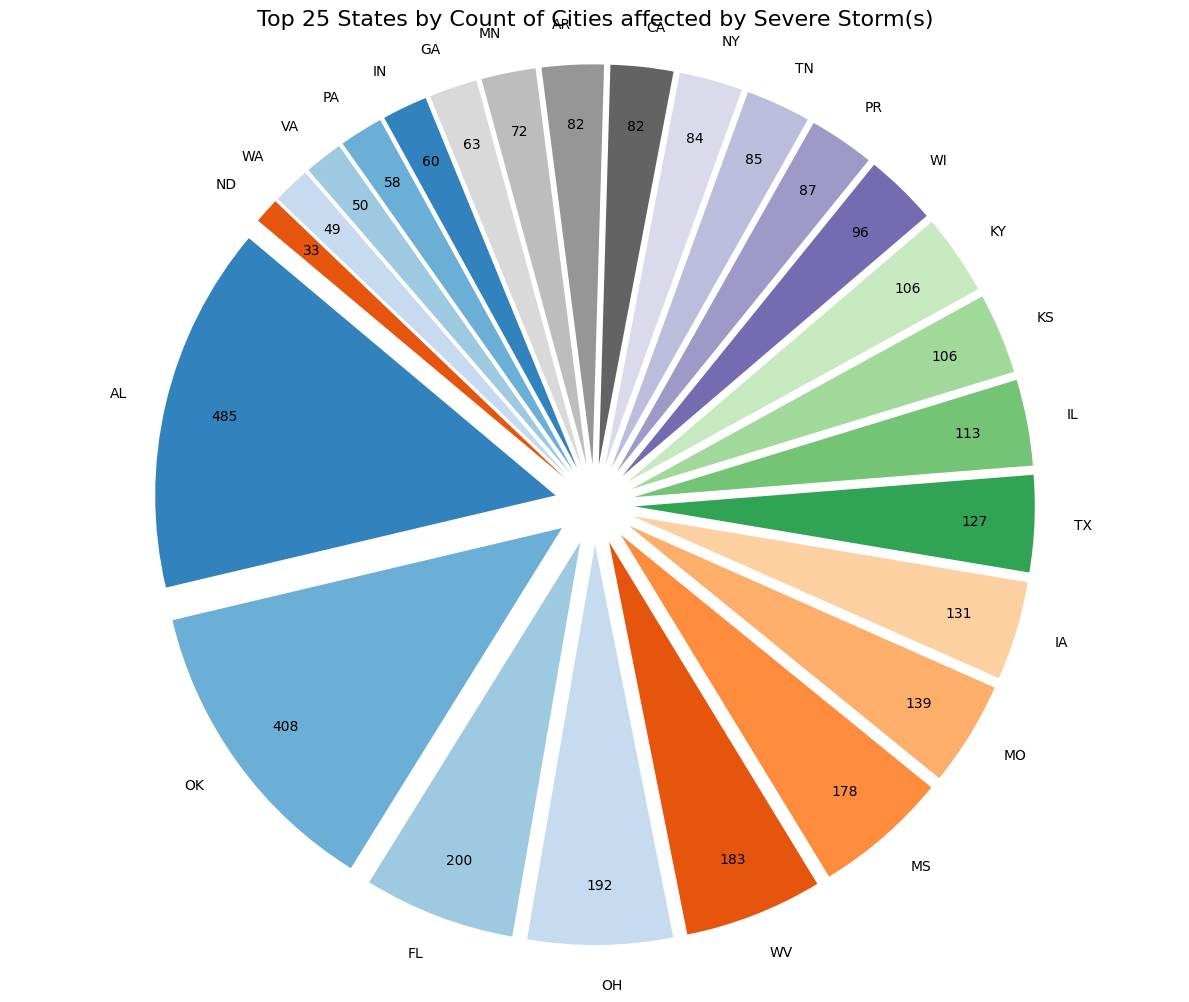

In [98]:
# Filter the merged data for 'Severe Storm(s)'
severe_storm_merged = merged_data_inner[merged_data_inner['incidentType'] == 'Severe Storm']

# Count the number of cities in each state after the filter
cities_by_state_severe_storm = severe_storm_merged.groupby('state_x')['city'].nunique().reset_index()

# Select the top 25 states with the most cities affected by Severe Storm(s)
top_25_states = cities_by_state_severe_storm.sort_values('city', ascending=False).head(25)

plt.figure(figsize=(12, 10))  # Enlarge the chart size for better readability

# Customizing pie chart aesthetics
colors = plt.cm.tab20c.colors  # Set a color scheme (adjust as needed)
explode = [0.1] * len(top_25_states)  # Separate each slice slightly
patches, texts, autotexts = plt.pie(
    top_25_states['city'],
    labels=top_25_states['state_x'],
    autopct=lambda p: f'{int(p * sum(top_25_states["city"])/100)}',
    colors=colors,
    explode=explode,
    startangle=140,
    pctdistance=0.85,  # Move percentage text inside the slices
)

# Annotate each slice with state names
for i, (label, color) in enumerate(zip(top_25_states['state_x'], colors)):
    plt.text(0, 0, label, ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Adjusting text properties for better readability
plt.title('Top 25 States by Count of Cities affected by Severe Storm(s)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


For this graph I planned on doing a map chart to show all the cites and states that had a report of severe storms. Sadly I could not figure out the code for it so I decided to do the next best thing, a Pie Chart!! I the orignal design I had all 50 US staes to show how many cites where effected by these storms. Sadly the number of states would block numbers and make it much harder to read and understand. To fix this I did the top 25 and I think it looks much better. Looking at the chart we can see that AL "Alabama" has had the highest number of severe storms, we will be using them for the next graph.

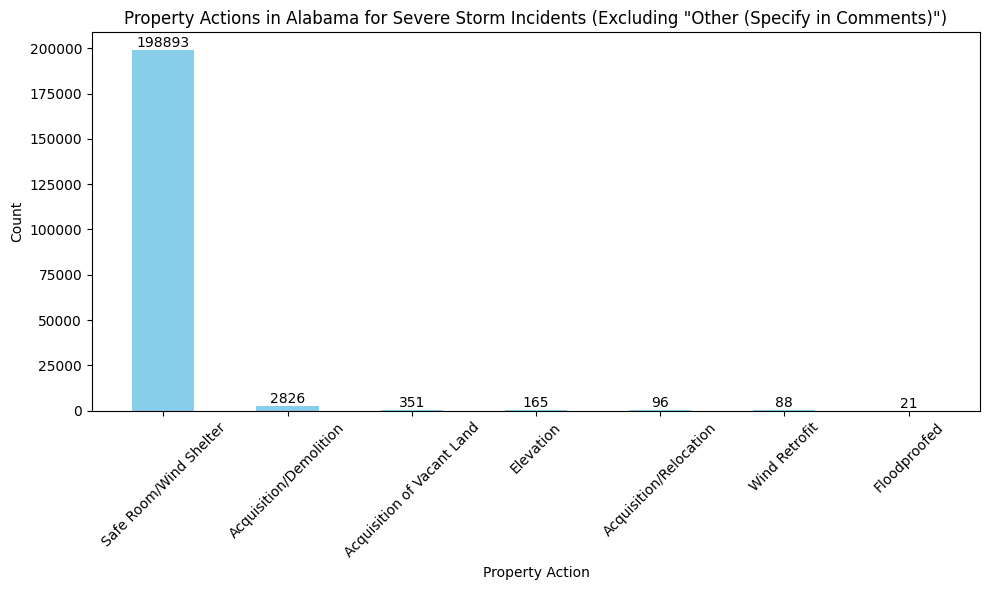

In [111]:
import matplotlib.pyplot as plt

# Filter the merged data for 'Severe Storm(s)' in Alabama
severe_storm_AL = merged_data_inner[(merged_data_inner['incidentType'] == 'Severe Storm') & (merged_data_inner['state_x'] == 'AL')]

# Count the occurrences of each propertyAction in Alabama for severe storm incidents
property_action_counts_AL = severe_storm_AL['propertyAction'].value_counts()

# Remove 'Other' from the propertyAction counts
property_action_counts_AL = property_action_counts_AL[property_action_counts_AL.index != 'Other (Specify in Comments)']

# Convert the categorical data to numeric indices for a histogram-like visualization
action_indices = range(len(property_action_counts_AL))

plt.figure(figsize=(10, 6))
plt.bar(action_indices, property_action_counts_AL, color='skyblue', width=0.5)
plt.title('Property Actions in Alabama for Severe Storm Incidents (Excluding "Other (Specify in Comments)")')
plt.xlabel('Property Action')
plt.ylabel('Count')
plt.xticks(action_indices, property_action_counts_AL.index, rotation=45)
plt.tight_layout()

# Annotate each bar with its count
for i, count in enumerate(property_action_counts_AL):
    plt.text(i, count, f'{count}', ha='center', va='bottom')

plt.show()


This chart shows that the best migitiation method for the state of Alabama is to have a safe room/wind shelter. I had a hard time trying the other migitation methods to show up. To anwser my question above, it would appear to be that the Safe room migation method would appear to be the best method one can do during a severe storm to stay safe.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the data with selected columns
file_path = 'Data/FEMA_DataSets/HazardMitigationAssistanceMitigatedProperties (2).csv'
columns_to_use = ['projectIdentifier', 'programArea', 'programFy', 'disasterNumber', 'propertyAction', 'structureType', 'typeOfResidency',
                  'foundationType', 'county', 'city', 'state', 'stateNumberCode', 'region', 'zip', 'damageCategory', 'actualAmountPaid',
                  'numberOfProperties', 'id']
data = pd.read_csv(file_path, usecols=columns_to_use, nrows=5000)

# Define the columns to check for missing values and drop rows with NaN in those columns
columns_to_check = ['propertyAction', 'structureType', 'typeOfResidency', 'foundationType', 'county', 'state', 'region', 'zip']
data.dropna(subset=columns_to_check, inplace=True)

columns_to_check = ['disasterNumber', 'damageCategory', 'actualAmountPaid']
data.dropna(subset=columns_to_check, inplace=True)

# Remove rows with missing values in the 'damageCategory' column
data.dropna(subset=['damageCategory'], inplace=True)

# Define features and target
features = data.drop('damageCategory', axis=1)
target = data['damageCategory']

# Split the data into training and test sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# Separate numeric and categorical columns
numeric_cols = train_features.select_dtypes(include='number').columns.tolist()
categorical_cols = train_features.select_dtypes(exclude='number').columns.tolist()

# Define separate transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a complete pipeline with the model (Random Forest Classifier)
model = RandomForestClassifier()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Train the model
pipeline.fit(train_features, train_target)

# Evaluate model performance
accuracy = pipeline.score(test_features, test_target)
print(f"Accuracy on test set: {accuracy}")


Accuracy on test set: 0.8043478260869565


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [16]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 15113 bytes to source.py
